In [33]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)

In [34]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')

In [35]:
print(matches.shape)

(950, 20)


In [36]:
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,501215,Kochi,18-04-11,2011,18,Kochi Tuskers Kerala,Chennai Super Kings,Nehru Stadium,Kochi Tuskers Kerala,field,N,Kochi Tuskers Kerala,Wickets,7.0,D/L,BB McCullum,"['BB McCullum', 'DPMD Jayawardene', 'PA Patel'...","['MEK Hussey', 'M Vijay', 'SK Raina', 'S Badri...",K Hariharan,AL Hill
1,980989,Kolkata,14-05-16,2016,45,Kolkata Knight Riders,Rising Pune Supergiants,Eden Gardens,Rising Pune Supergiants,bat,N,Kolkata Knight Riders,Wickets,8.0,D/L,YK Pathan,"['RV Uthappa', 'G Gambhir', 'MK Pandey', 'YK P...","['AM Rahane', 'UT Khawaja', 'GJ Bailey', 'SS T...",A Nand Kishore,BNJ Oxenford
2,733993,Delhi,10-05-14,2014,32,Delhi Daredevils,Sunrisers Hyderabad,Feroz Shah Kotla,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,8.0,D/L,DW Steyn,"['Q de Kock', 'KP Pietersen', 'MA Agarwal', 'K...","['AJ Finch', 'S Dhawan', 'DA Warner', 'NV Ojha...",RM Deshpande,BNJ Oxenford
3,1136578,Kolkata,21-04-18,2018,18,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,9.0,D/L,KL Rahul,"['CA Lynn', 'SP Narine', 'RV Uthappa', 'N Rana...","['KL Rahul', 'CH Gayle', 'MA Agarwal', 'KK Nai...",A Deshmukh,C Shamshuddin
4,980997,Visakhapatnam,17-05-16,2016,49,Rising Pune Supergiants,Delhi Daredevils,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rising Pune Supergiants,field,N,Rising Pune Supergiants,Runs,19.0,D/L,AB Dinda,"['AM Rahane', 'UT Khawaja', 'GJ Bailey', 'SS T...","['Q de Kock', 'SS Iyer', 'KK Nair', 'SV Samson...",Nitin Menon,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1254107,Sharjah,25-09-21,2021,37,Punjab Kings,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Punjab Kings,Runs,5.0,NaN,JO Holder,"['KL Rahul', 'MA Agarwal', 'CH Gayle', 'AK Mar...","['DA Warner', 'WP Saha', 'KS Williamson', 'MK ...",RK Illingworth,YC Barde
946,1178395,Bengaluru,07-04-19,2019,20,Royal Challengers Bangalore,Delhi Capitals,M.Chinnaswamy Stadium,Delhi Capitals,field,N,Delhi Capitals,Wickets,4.0,NaN,K Rabada,"['PA Patel', 'V Kohli', 'AB de Villiers', 'MP ...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'CA Ingram'...",S Ravi,YC Barde
947,1178399,Mumbai,10-04-19,2019,24,Kings XI Punjab,Mumbai Indians,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,3.0,NaN,KA Pollard,"['KL Rahul', 'CH Gayle', 'DA Miller', 'KK Nair...","['Q de Kock', 'SD Lad', 'SA Yadav', 'KA Pollar...",S Ravi,YC Barde
948,1175358,Mumbai,24-03-19,2019,3,Delhi Capitals,Mumbai Indians,Wankhede Stadium,Mumbai Indians,field,N,Delhi Capitals,Runs,37.0,NaN,RR Pant,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'CA Ingram'...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Yuvraj...",S Ravi,YC Barde


In [37]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

<h1>Total number of matches played</h1>

In [38]:
print('Total number of matches played till date: ', matches["ID"].count())

Total number of matches played till date:  950


In [39]:
matches.Season

0      2011
1      2016
2      2014
3      2018
4      2016
       ... 
945    2021
946    2019
947    2019
948    2019
949    2019
Name: Season, Length: 950, dtype: object

In [40]:
#unique function returns an array containing distinct values from the series
print('Total number of seasons played till date: ', len(matches["Season"].unique()))

Total number of seasons played till date:  15


<h1>Total no. of matches played in each season</h1>

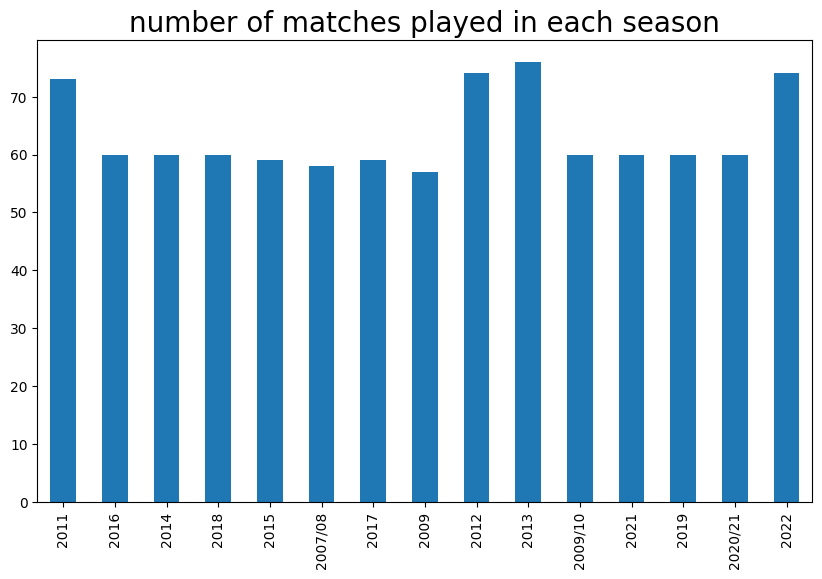

In [41]:
# c = sns.countplot(x='Season', data=matches)
# c.set_xlabel('Season')
# c.set_ylabel('Match Count')
matches['Season'].value_counts(sort=False).plot.bar()
plt.title("number of matches played in each season", fontsize=20)
plt.show()

## Maximum and minimum matches in a season.

In [42]:
max_match = matches.groupby(['Season']).count().MatchNumber.max()
print('No. of maximum matches played in a season:', max_match)

No. of maximum matches played in a season: 76


In [43]:
min_match = matches.groupby(['Season']).count().MatchNumber.min()
print('No. of minimum matches played in a season:', min_match)

No. of minimum matches played in a season: 57


In [44]:
matches_each_season = matches.groupby(['Season'])['ID'].count()
print('Most number of matches "%s" were played in "%s"\n'%(matches_each_season.max(),matches_each_season.idxmax()))
print('Least number of matches "%s" were played in "%s"'%(matches_each_season.min(),matches_each_season.idxmin()))


# matches_each_season = matches.groupby(['Season'])['ID'].count()
# print('Most number of matches "{}" were played in "{}"\n'.format(matches_in_each_season.max(),matches_in_each_season.idxmax()))
# print('Least number of matches "{}" were played in "{}"'.format(matches_in_each_season.min(),matches_in_each_season.idxmin()))

Most number of matches "76" were played in "2013"

Least number of matches "57" were played in "2009"


## Number of matches won by each team. 

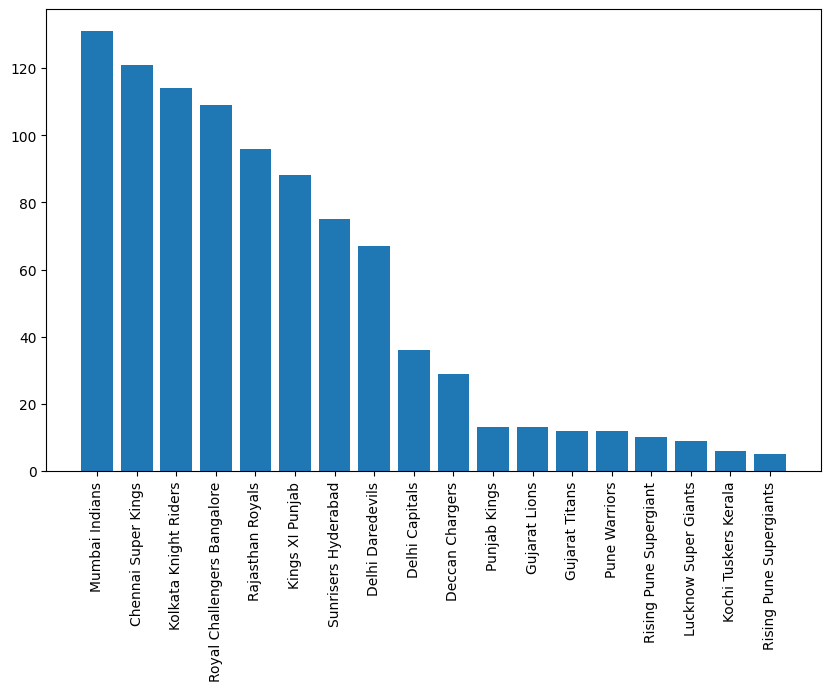

In [45]:
match = matches['WinningTeam'].value_counts().values
teams = matches['WinningTeam'].value_counts().index
plt.bar(teams,match)
plt.xticks(rotation=90)
plt.show()

## Number of finals won by a team.

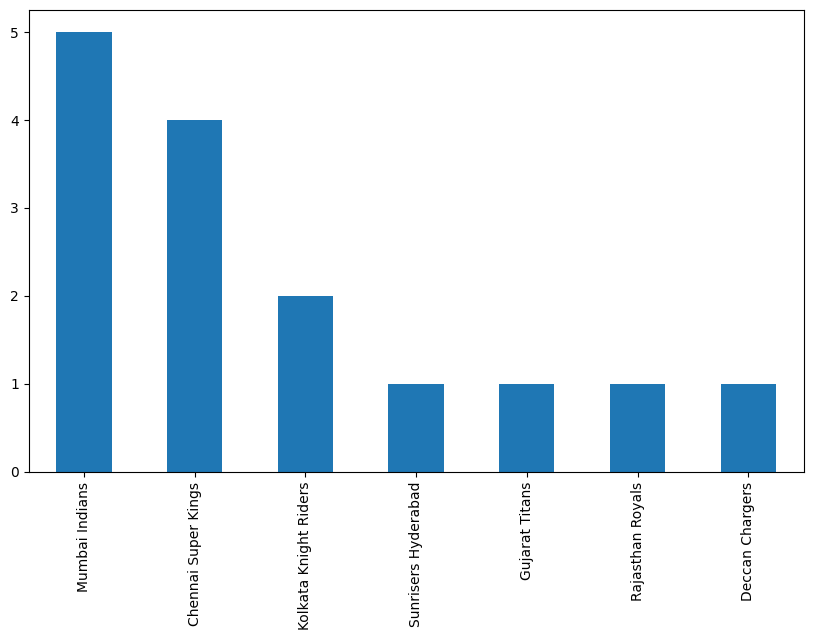

In [46]:
final_winners = matches[matches['MatchNumber'] == 'Final']['WinningTeam'].value_counts()
final_winners.plot.bar()
plt.show()

## Number of stadiums where IPL matches have been conducted.

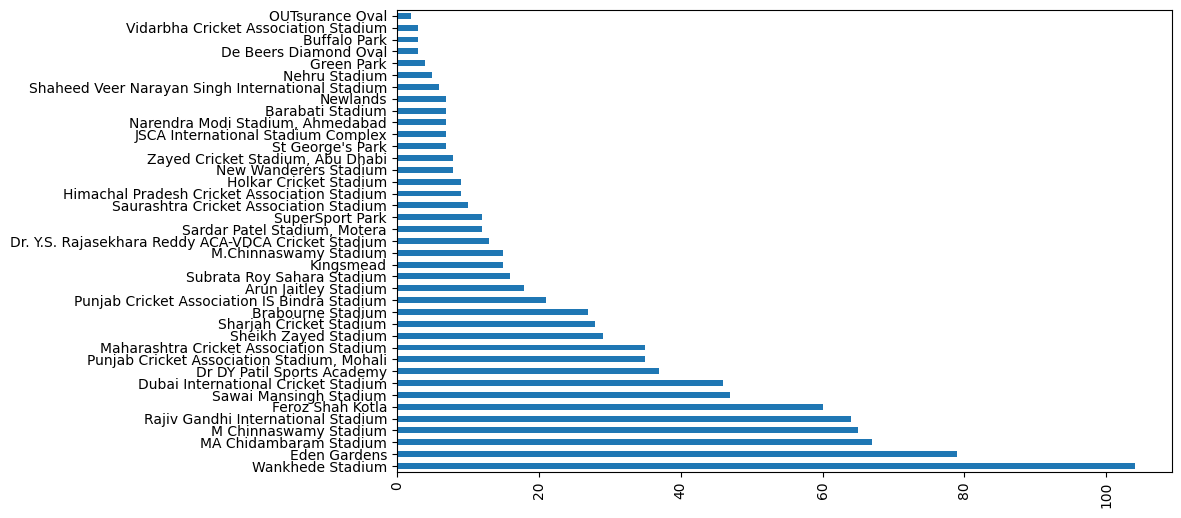

In [47]:
matches['Venue'].value_counts().plot.barh()
plt.xticks(rotation=90)
plt.show()

## Number of matches played in each stadium.

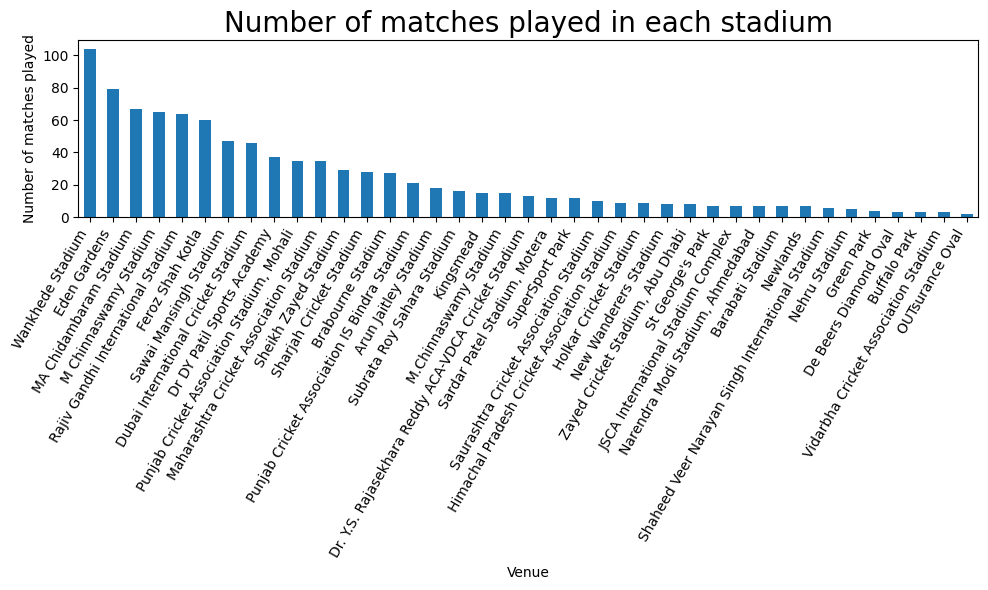

In [48]:
c = matches['Venue'].value_counts().plot.bar()
c.set_xlabel('Venue')
c.set_ylabel('Number of matches played')
plt.title("Number of matches played in each stadium",fontsize=20)
c.set_xticklabels(c.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

## Top 10 stadiums with maximum matches held.

<AxesSubplot: >

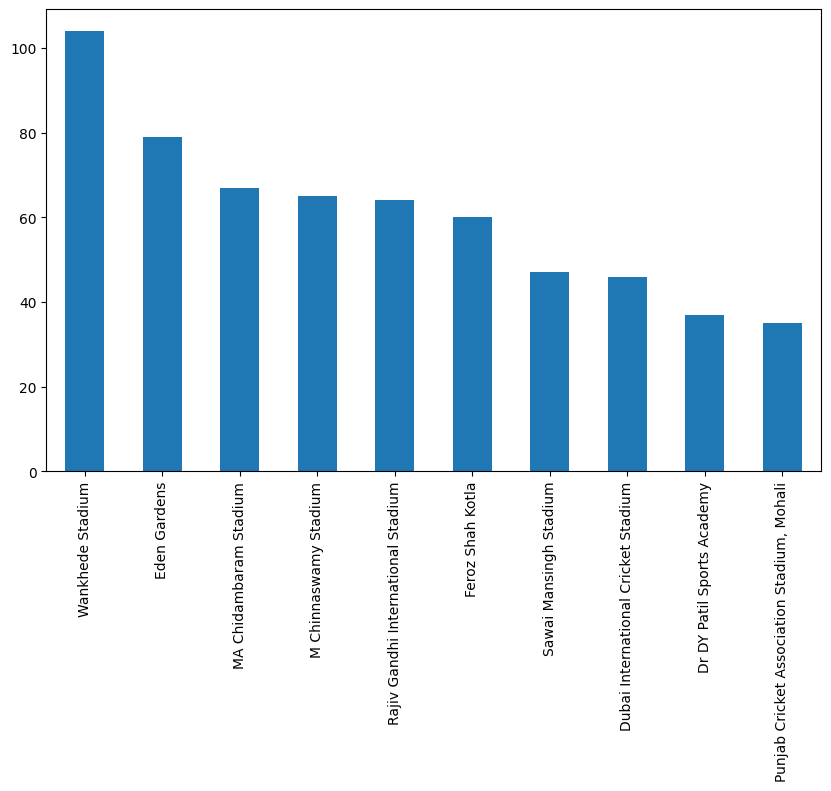

In [49]:
top_stadium = matches['Venue'].value_counts()[:10]
top_stadium.plot.bar()

## Decision made after winning the toss - bat or field.

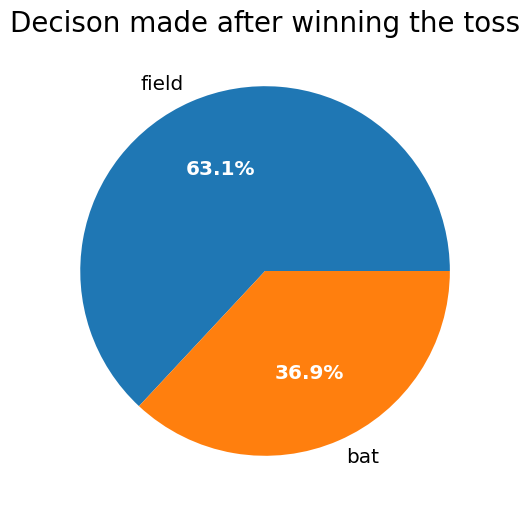

In [50]:
toss_decision_series = matches['TossDecision'].value_counts()
labels = (np.array(toss_decision_series.index))
values = (np.array((toss_decision_series / toss_decision_series.sum())*100))

fig, ax = plt.subplots()
patches, texts, pcts = ax.pie(values,labels=labels,autopct='%.1f%%',textprops={'size': 'x-large'})
plt.setp(pcts, color='white', fontweight='bold')
plt.title('Decison made after winning the toss',fontsize=20)
plt.show()

#### *Inference:* After winning the toss, a team tends to field first and chase the target.

## Has Toss-winning helped in Match-winning?

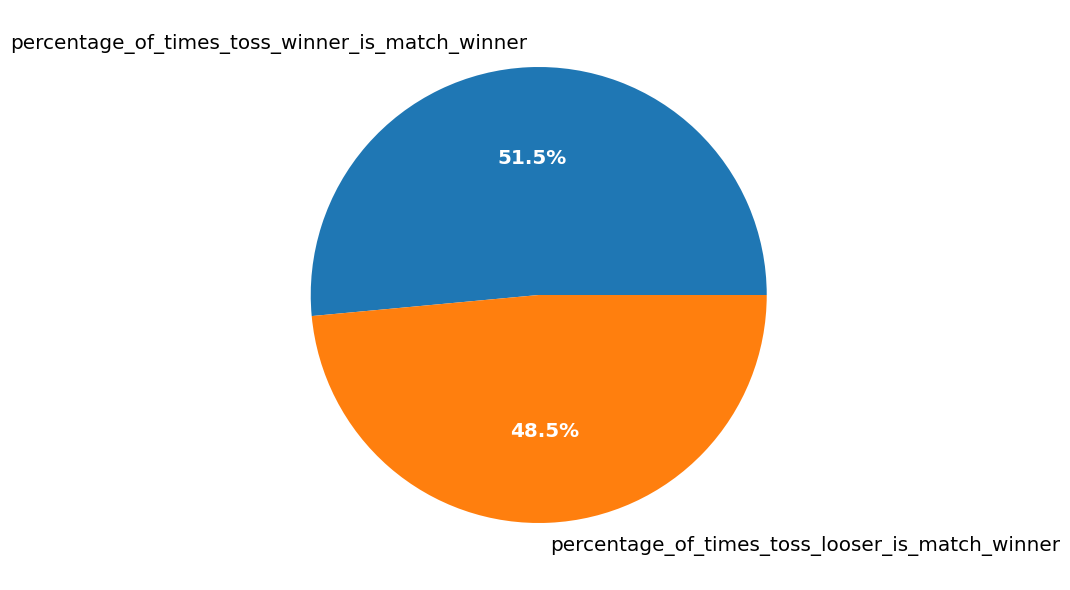

In [51]:
number_of_times_toss_winner_is_match_winner = matches[matches['TossWinner'] == matches['WinningTeam']]['ID'].count()
number_of_times_toss_looser_is_match_winner = matches[matches['TossWinner'] != matches['WinningTeam']]['ID'].count()

labels = ['percentage_of_times_toss_winner_is_match_winner','percentage_of_times_toss_looser_is_match_winner']
fig_size, axes = plt.subplots()
patches, texts, pcts = axes.pie([number_of_times_toss_winner_is_match_winner,number_of_times_toss_looser_is_match_winner],labels=labels,autopct='%.1f%%',textprops={'size': 'x-large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title("Toss win/loose vs match win",fontsize=20)
plt.tight_layout()
plt.show()

##### *Inference*: Though winning toss gives teams an advantage but **it doesn't significantly implies that winning the toss helps in winning the game.**

<h2>Toss decision vs win/loss</h2>

In [52]:
matches[matches['TossWinner'] == matches['WinningTeam']]['WinningTeam'].value_counts()

Mumbai Indians                 70
Chennai Super Kings            68
Kolkata Knight Riders          64
Royal Challengers Bangalore    53
Rajasthan Royals               49
Kings XI Punjab                36
Delhi Daredevils               35
Sunrisers Hyderabad            34
Delhi Capitals                 21
Deccan Chargers                19
Gujarat Lions                  10
Gujarat Titans                  7
Rising Pune Supergiant          5
Lucknow Super Giants            4
Kochi Tuskers Kerala            4
Punjab Kings                    4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: WinningTeam, dtype: int64

In [53]:
d = matches[matches['TossWinner'] != matches['WinningTeam']]['WinningTeam'].value_counts()

## Toss decision vs win/loss analysis.

## Top 15 player of the match winners.

AB de Villiers    25
CH Gayle          22
RG Sharma         18
DA Warner         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
G Gambhir         13
SP Narine         12
AM Rahane         12
MEK Hussey        12
KL Rahul          12
Name: Player_of_Match, dtype: int64


<AxesSubplot: >

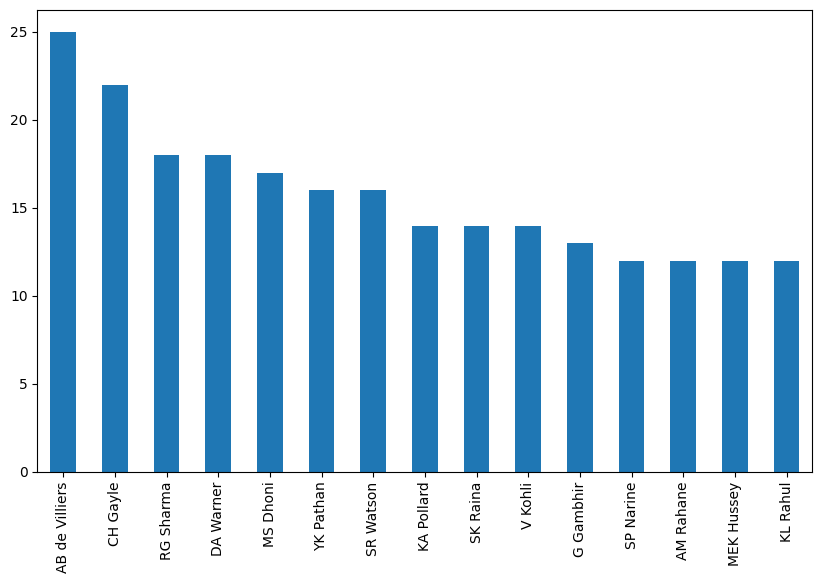

In [55]:
top_player = matches['Player_of_Match'].value_counts()[:15]
print(top_player)
top_player.plot.bar()

## Umpires who have umpired in maximum matches.

In [116]:
max_match_umpire1 = matches.groupby(['Umpire1'])['Umpire1'].count().reset_index(name='match_count')
max_match_umpire2 = matches.groupby(['Umpire2'])['Umpire2'].count().reset_index(name='match_count')
umpire1 = max_match_umpire1[max_match_umpire1['match_count'] == max_match_umpire1['match_count'].max()]
umpire2 = max_match_umpire2[max_match_umpire2['match_count'] == max_match_umpire2['match_count'].max()]
name_umpire1 = umpire1
name_umpire1

,Umpire1,match_count
2,AK Chaudhary,95


In [81]:
max_match_umpire1 = matches.groupby(['Umpire1'])['Umpire1'].count().reset_index(name='match_count')
max_match_umpire2 = matches.groupby(['Umpire2'])['Umpire2'].count().reset_index(name='match_count')
umpire1 = max_match_umpire1[max_match_umpire1['match_count'] == max_match_umpire1['match_count'].max()]
umpire2 = max_match_umpire2[max_match_umpire2['match_count'] == max_match_umpire2['match_count'].max()]

print("The two umpires who have umpired in maximum matches are:")
print(list(umpire1['Umpire1'])[0],"in",list(umpire1['match_count'])[0],"matches\n",list(umpire2['Umpire2'])[0],"in",list(umpire2['match_count'])[0],"matches\n")

The two umpires who have umpired in maximum matches are:
AK Chaudhary in 95 matches
 S Ravi in 83 matches

